# Final Project Submission

Student name: **Fidelis Wanalwenge**

Student pace: **Part Time**

Instructor name: **Asha Deen**

# Business Understanding

Due to heightened competition in the telecommunications industry, SyriaTel is increasingly concerned with accurately forecasting customer churn as a means to maintain a competitive edge. Customer retention is of utmost importance to the company since it is more cost-effective to keep existing customers than to acquire new ones. By leveraging data analysis and predictive analytics, SyriaTel aims to uncover trends and signals that can help them foresee customer actions and take proactive steps to minimize churn rates. Thus, SyriaTel is in search of predictive machine learning models that can anticipate whether customers are likely to churn or not. This, in turn, will enable the company to implement preemptive measures for retaining these customers. The data used for this analysis will include information about customer demographics such as location and usage patterns, including call histories and charges. It is essential for SyriaTel to continually adapt and update its models to keep pace with evolving customer behavior and changes in the market landscape to ensure the effectiveness of their customer retention strategies.

**Objectives**

1. Create machine learning models that can predict customer churn by using data to analyze customer features.

2. Comparing the build machine learning models and determine the most accurate model in prediction.

3. The analysis aims to identify the specific features that have a significant impact on the customer churn rate in SyriaTel, provide valuable recommendations based on the findings hence help to mitigate churn rates in the company and improve customer retention.

# Data Understanding

This helps to us to acquire knowledge and comprehension about this dataset before further analysis and modeling.

In [1]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch 
from sklearn.feature_selection import SelectFromModel 
from sklearn.linear_model import LogisticRegressionCV

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file to read and check the data 
syriatel_df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
syriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking the shape of the data
syriatel_df.shape

(3333, 21)

In [4]:
# checking for data information 
syriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We can observe that thephone number and account length columns hold no significance for this analysis; therefore, we will remove them. The dataset comprises both categorical and numerical columns

In [5]:
#dropping irrelevant columns 
syriatel_df= syriatel_df.drop(columns= ['state','phone number', 'account length', 'area code'], axis=1)
syriatel_df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#separating categorical and numerical colums for easier analysis 
numerical_df = syriatel_df[['number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]
categorical_df = syriatel_df[['churn', 'international plan', 'voice mail plan']]

**Checking for duplicates and NaN values**

In [7]:
#checking for missing values 
syriatel_df.isna().sum()

international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
#checking for duplicates 
syriatel_df.duplicated().value_counts()

False    3333
dtype: int64

**Exploratory Data Analysis**

In [9]:
# getting basic statistics of our dataset 
syriatel_df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the basic statistics we can gain initial insights into the data's distribution, central tendency, and variability.

**Visualization of relationships in columns**

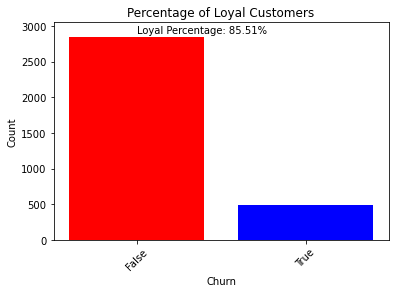

In [10]:
#checking the percentage of loyal customers using visual 
churn_counts = syriatel_df['churn'].replace({0: 'False', 1: 'True'}).value_counts()

#calculating the percentage of loyal customers 
loyal_percentage = churn_counts.get('False', 0) / sum(churn_counts) * 100
# Plot the bar chart with the correct labels
plt.bar(['False', 'True'], churn_counts.values, color=['red', 'blue'], tick_label=['False', 'True'])
plt.title('Percentage of Loyal Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, max(churn_counts) + 200)
# Display loyal percentage only if 'False' exists in churn_counts
if 'False' in churn_counts:
    plt.text(0, max(churn_counts) + 50, f'Loyal Percentage: {loyal_percentage:.2f}%')
plt.show()

It can be seen that most of the customers are loyal to the SyriaTel company as seen from total false churn

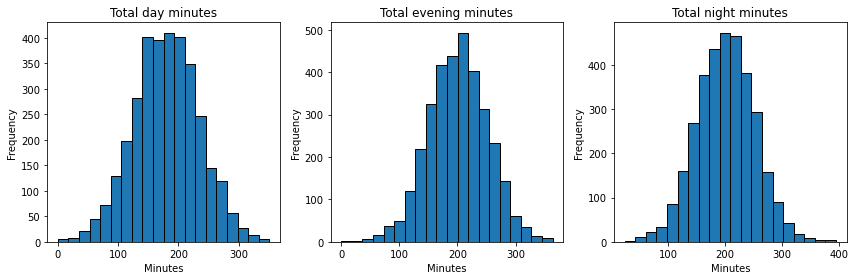

In [11]:
#visualizing the total charge of calls per area code
import matplotlib.pyplot as plt

# Create subplots for each variable
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms for each variable
axs[0].hist(syriatel_df['total day minutes'], bins=20, edgecolor='k')
axs[0].set_title('Total day minutes')
axs[0].set_xlabel('Minutes')
axs[0].set_ylabel('Frequency')

axs[1].hist(syriatel_df['total eve minutes'], bins=20, edgecolor='k')
axs[1].set_title('Total evening minutes')
axs[1].set_xlabel('Minutes')
axs[1].set_ylabel('Frequency')

axs[2].hist(syriatel_df['total night minutes'], bins=20, edgecolor='k')
axs[2].set_title('Total night minutes')
axs[2].set_xlabel('Minutes')
axs[2].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout();

* The distribution of total minutes a day, in the evening and at night is normal.
* Both the total evning and total night have a mean of around 200 while total day minutes has mean of around 150 from the graph.
* All the total calls made on diffrent times of the day have almost same mean.

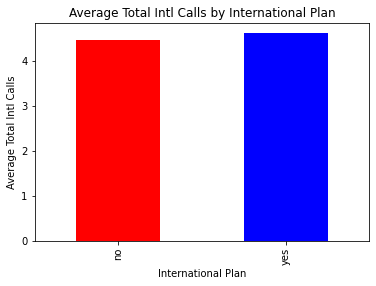

In [12]:
#visualizing for the international calls made by people 
# Group by 'international plan' and calculate the mean of 'total intl calls'
grouped_data = syriatel_df.groupby('international plan')['total intl calls'].mean()

# Plot the bar plot
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', color=['red', 'blue'], ax=ax)

# Add labels and title to the plot
ax.set_xlabel('International Plan')
ax.set_ylabel('Average Total Intl Calls')
ax.set_title('Average Total Intl Calls by International Plan');


* The bar graph indicates that there isn't a significant difference in terms of subscribing to international plans between people who frequently make international calls and those who do not.
* On average, a similar number of individuals opt for international plans, whether they make a lot of international calls or not.

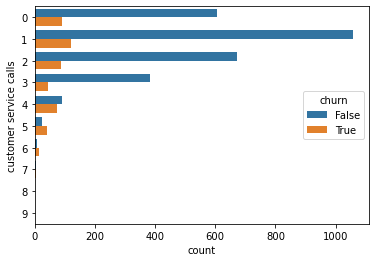

In [13]:
#visualizing the relationship between the number of calls to the call center and loyalty

sns.countplot(y='customer service calls', hue='churn', data=syriatel_df); #using searbon to plot the countplot

The chart above depicts the relationship between the number of calls to the call center and loyalty. The chart shows that there is much relationship betwen calls and loyalty as most people making the calls are loyal to SyriaTel hence having lower probalility of switching.

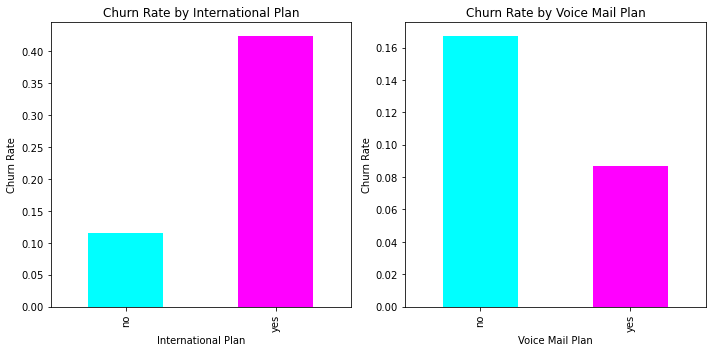

In [14]:
#visualizing for the international calls made by people 
# Map the values in 'voice mail plan' column to labels

# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot: International Plan
syriatel_df.groupby('international plan')['churn'].mean().plot(kind='bar', ax=axes[0], color=['cyan', 'magenta'])
axes[0].set_xlabel('International Plan')
axes[0].set_ylabel('Churn Rate')
axes[0].set_title('Churn Rate by International Plan')

# Plot the second subplot: Voice Mail Plan
syriatel_df.groupby('voice mail plan')['churn'].mean().plot(kind='bar', ax=axes[1], color=['cyan', 'magenta'])
axes[1].set_xlabel('Voice Mail Plan')
axes[1].set_ylabel('Churn Rate')
axes[1].set_title('Churn Rate by Voice Mail Plan')

# Adjust the spacing between subplots
plt.tight_layout();

* Looking at the graph above shows that there is more customers loyalty by Voice mail plan subscribers due to lower churn rate
* Customers have higher rate of churn and higher probabiliy to swich from SyriaTel in terms of international plan.
* This shows that customers are more happy with voice mail than international plan.

**Outliers**

In [15]:
#writing a function to check for outliers 
def detect_outliers(data):
# Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
# determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# identifying outliers 
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [16]:
#checking for outliers using the function 
detect_outliers(numerical_df).sum()

number vmail messages       51.00
total day minutes         3928.20
total day calls           1807.00
total day charge           667.81
total eve minutes         4175.90
total eve calls           1836.00
total eve charge           354.95
total night minutes       6180.80
total night calls         2647.00
total night charge         278.13
total intl minutes         286.60
total intl calls          1001.00
total intl charge           91.57
customer service calls    1223.00
dtype: float64

In [17]:
def remove_outliers(data):
    # Calculating the quartiles and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determining the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data

In [18]:

#using the function above to remove outliers 
filtered_data = remove_outliers(numerical_df)

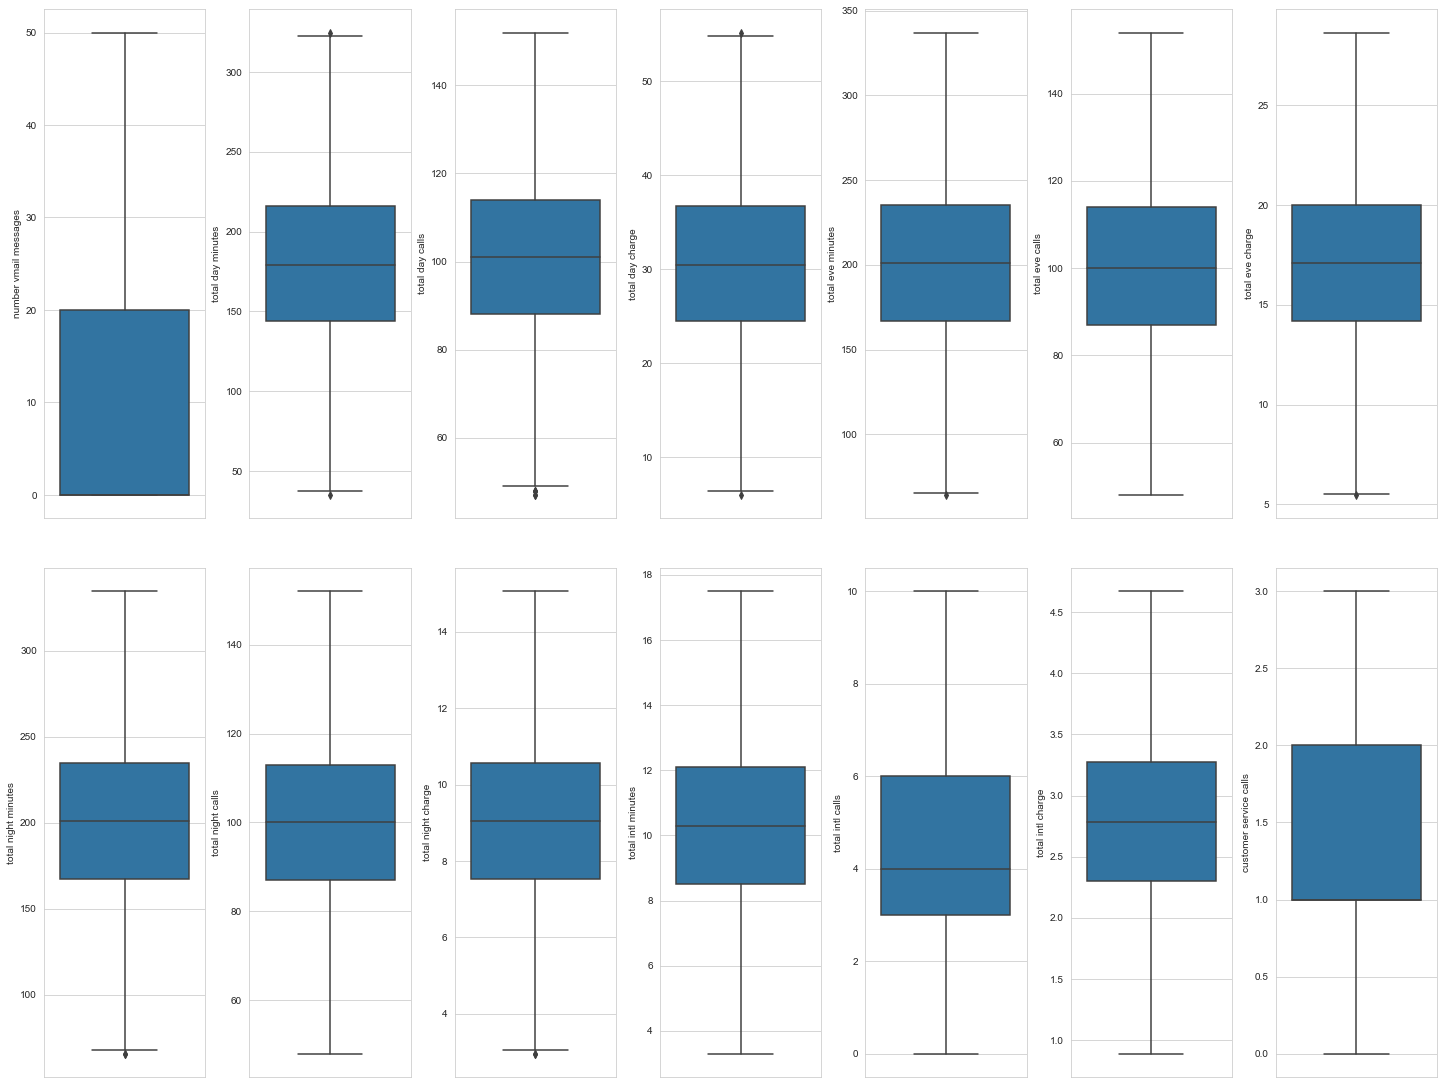

In [19]:
#checking for any outliers in the dataset using box plot 
# visualizing with matplotlib and seaborn 
sns.set_style('whitegrid')
fig,ax = plt.subplots(ncols=7,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in filtered_data.items():
    sns.boxplot(y = col,data = filtered_data,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);

# Data Preparation

**Selecting most important feactures for our modelling**

In order to select best features for modelling we will use heatmap to check the correlation existing between variables to be used in the model

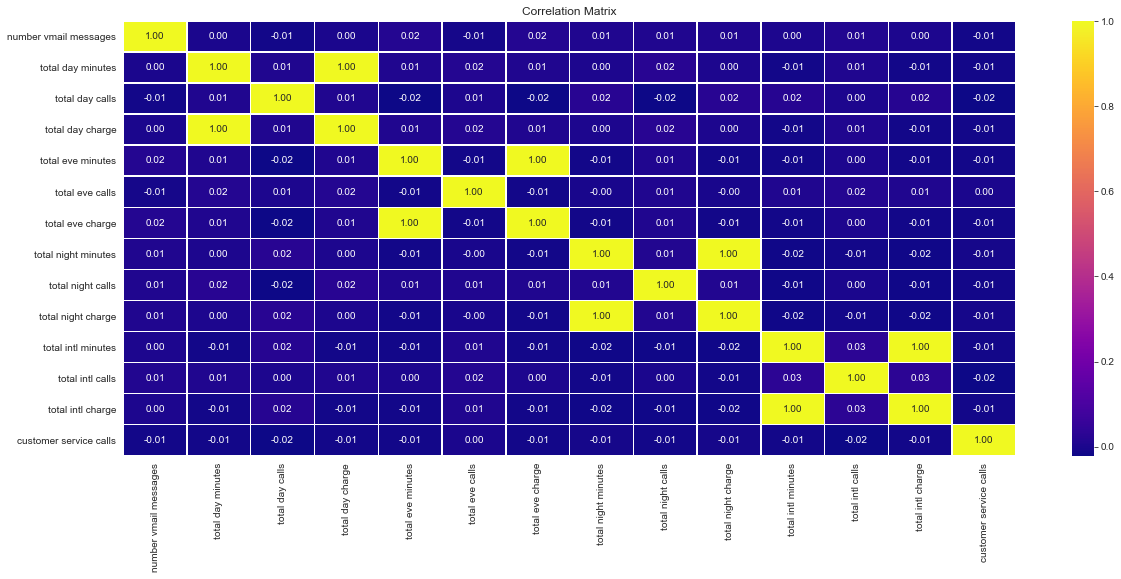

In [20]:
#using heatmap to check for correlation 
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* The heatmap reveals that certain variables exhibit perfect correlations with others. When predictor variables are highly correlated, it can lead to multicollinearity, which in turn can result in unstable and unreliable estimates of the model parameters. To mitigate this issue, we will address the high correlations by removing one of the correlated factors.
* Hence we will remove one of the correlated factors which is total day minutes, total eve minutes, total night minutes and total intl minutes
* Drop area code since its not imporant for modelling
* We will also drop state which is categorical variable since its of least importance in modelling

**Dropping perfect correlated variable**

In [21]:
#droping features with perfect correlation using our previous syriatel_df 
syriatel1_df = syriatel_df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'])

In [22]:
#checking for the shape of the data
syriatel1_df.shape

(3333, 13)

The final values from here are the ones to be used for modelling since the 15 columns are suitable for analysis

**Transforming categorical variables using OHE**

In [23]:
#transformimg categorical data using OHE

# Select the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(syriatel1_df[categorical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(categorical_columns))

# Concatenate the encoded DataFrame with the remaining columns from the original DataFrame
final_df = pd.concat([syriatel1_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

final_df

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,1.0,0.0,0.0,1.0
1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,1.0,0.0,0.0,1.0
2,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,1.0,0.0,1.0,0.0
3,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,0.0,1.0,1.0,0.0
4,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False,1.0,0.0,0.0,1.0
3329,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False,1.0,0.0,1.0,0.0
3330,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False,1.0,0.0,1.0,0.0
3331,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False,0.0,1.0,1.0,0.0


In [24]:
#convert churn using label ecoder using a function
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column 
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

# Modeling

**Train test split**

This will serve as a testing dataset, used to assess the performance of the trained model when applied to data it has not encountered before. Through this evaluation on the test set, we can gauge how effectively the model extrapolates its learned patterns and behaviors to handle fresh, unfamiliar data.

In [25]:
#using the standard scaler to standardize the data 
# Split the data into features (X) and target variable (y)
X = final_df.drop(columns='churn', axis=1)
y = final_df['churn']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Preprocessing**

**Standardization**

* We will employ standardization to normalize the features within the syriatel_df dataset, aiming to achieve a mean of zero and a variance of one for each feature. This procedure is essential as it aligns all the features to a consistent scale, offering advantages for our machine learning algorithms, particularly those sensitive to variations in the input feature scales.

In [26]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**using SMOTE to remove class imbalance**

* SMOTE helps us to address this class imbalance issue by creating synthetic samples of the minority class to balance the dataset.

In [27]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 1.Builing a baseline Logistic Regression Model

In [28]:
#Buiding a baseline model logistic regression model 

# Create an instance of Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred_1 = logreg.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_1)

In [29]:
#creating a function for checking for metrics 
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results

In [30]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()
    
    return report

In [31]:
# calling the function to get classifification report values
logreg_report = generate_classification_report(y_test, y_test_pred_1)
logreg_report

,precision,recall,f1-score,support
0,0.939785,0.772085,0.847721,566.000000
1,0.361386,0.722772,0.481848,101.000000
accuracy,0.764618,0.764618,0.764618,0.764618
macro avg,0.650586,0.747429,0.664784,667.000000
weighted avg,0.852201,0.764618,0.792319,667.000000


* Precision: The precision values for class 0 and class 1 are 0.88 and 0.587, respectively. A higher precision signifies that the model has a lower rate of false positives for that specific class. In this case, class 0 has a higher precision than class 1, indicating that the model is more accurate in predicting class 0.

* Recall: The recall values for class 0 and class 1 are 0.966 and 0.267, respectively. Recall reflects the model's ability to correctly identify positive instances. Once again, class 0 has a higher recall compared to class 1.

* F1-Score: The F1-scores for class 0 and class 1 are 0.92 and 0.367, respectively. The F1-score combines precision and recall, striking a balance between the two metrics. Consistently, class 0 exhibits a higher F1-score than class 1.

* Accuracy: The model's accuracy is 0.861, signifying the proportion of correctly predicted instances out of the total instances.

* Therefore, the logistic regression model achieves an 86.1% accuracy rate on the test data.

* In summary, the model appears to perform more effectively for class 0 compared to class 1.

{'roc_auc_train': 0.7596322241681261,
 'roc_auc_test': 0.7474285414407164,
 'accuracy_train': 0.7596322241681261,
 'accuracy_test': 0.7646176911544228,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a0b7c60ee0>}

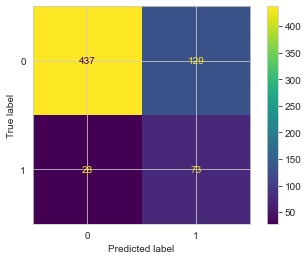

In [32]:
#checking the metric of baseline model and draw confusion matrix using above function 
evaluate_model_metrics(logreg, X_train_resampled,y_train_resampled, X_test, y_test)

* From the provided information, it's evident that the logistic regression model exhibits a relatively high level of discrimination between classes in the training data, as indicated by a train ROC-AUC value of 0.8938, compared to a slightly lower value of 0.6169 on the testing data.

* The confusion matrix illustrates the model's predicted and true labels, revealing 27 true positives, 74 false negatives, 547 true negatives, and 10 false positives.

* In summary, the model attains a training accuracy of approximately 89.4% and a testing accuracy of around 86.0%. This suggests that the model performs reasonably well in predicting class labels for both the training and testing datasets.

* However, it is apparent that the model's accuracy in predictions, as indicated by the confusion matrix, is not as precise, and there is some degree of overfitting

**Cross validation score to improve model performance and reduce overfit**

In [33]:
# Create an instance of Logistic Regression with cross-validation
logreg_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
logreg_final.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.7602889667250436,
 'roc_auc_test': 0.7375275513417066,
 'accuracy_train': 0.7602889667250438,
 'accuracy_test': 0.7616191904047976,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a0b7f1fac0>}

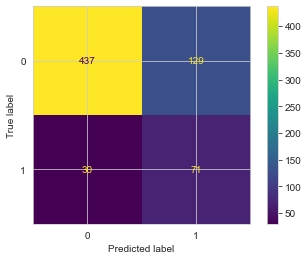

In [34]:
evaluate_model_metrics(logreg_final,X_train_resampled,y_train_resampled,X_test,y_test)

* Upon implementing cross-validation with 5 folds, the model's performance improved. The accuracy mean is 0.8621, which translates to an 86.2% accuracy rate in predicting customer churn within the test data. In the training data, accuracy remained consistent at 0.8621.

* This adjusted model demonstrates little to no significant change in its performance, effectively predicting class labels across both the training and testing datasets.

* While the testing accuracy is slightly lower than the training accuracy, this disparity is within the expected range. As a result, we can proceed with evaluating the second model to determine its effectiveness in predicting customer churn and whether it outperforms logistic regression.

# 2. Building Decison Trees classifier model

In [35]:

# Create an instance of DecisionTreeClassifier with regularization parameters
dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Fit the model on the training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred_2= dt_clf.predict(X_train_resampled)
y_test_pred_2 = dt_clf.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_2)

{'roc_auc_train': 0.8918563922942206,
 'roc_auc_test': 0.8797886855823391,
 'accuracy_train': 0.8918563922942206,
 'accuracy_test': 0.9340329835082459,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a0b8373430>}

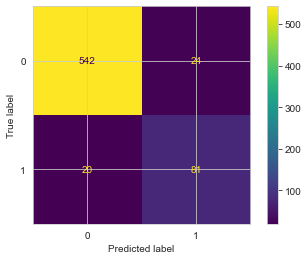

In [36]:
#checking for decison tree metrics using the predefiend function 
evaluate_model_metrics(dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)

Regarding the metrics for the Decision Tree classifier:

roc_auc_train: This metric evaluates the model's proficiency in distinguishing between the two classes (positive and negative) within the training data. An impressive value of 0.886 indicates that the model excels at classifying instances in the training set.

roc_auc_test: This metric measures the model's capacity to generalize its predictions to unseen data. The value of 0.870 suggests that the model maintains a high level of performance on the testing data, signifying that it avoids overfitting.

accuracy_train: With an accuracy value of 0.886 on the training data, the model demonstrates a high level of precision in correctly classifying instances within the training set.

accuracy_test: An accuracy value of 0.925 on the testing data indicates that the model performs exceptionally well, emphasizing its ability to generalize effectively and avoid overfitting.

The confusion matrix reveals the following: 80 true positives (TP), 537 true negatives (TN), 29 false positives (FP), and 21 false negatives (FN). This indicates improved predictive capabilities.

To gain further insights, we will delve into the classification report, which provides a comprehensive overview of various metrics related to the Decision Tree classifier's performance.

In [37]:
#using predefined function to check for classification report
dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
dt_clf_report

,precision,recall,f1-score,support
0,0.964413,0.957597,0.960993,566.000000
1,0.771429,0.801980,0.786408,101.000000
accuracy,0.934033,0.934033,0.934033,0.934033
macro avg,0.867921,0.879789,0.873700,667.000000
weighted avg,0.935190,0.934033,0.934556,667.000000


Precision: In class 0, the precision is 0.962, indicating that 96.2% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.733, meaning that 73.3% of the instances predicted as class 1 are true positives.

Recall: In class 0, the recall is 0.949, indicating that 94.9% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.79, meaning that 79% of the actual class 1 instances are correctly identified as true positives.

F1-score: In class 0, the F1-score is 0.956, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.762, suggesting a slightly lower balance between precision and recall for class 1.

Accuracy: Accuracy is the overall proportion of correctly classified instances. In this case, the accuracy is 0.975, meaning that the model correctly predicts the class labels for 92.5% of the instances.

Macro avg: Macro average calculates the average metrics (precision, recall, F1-score) for both classes, giving equal weight to each class which are 0.848155, 0.870421 and 0.858710 while Weighted avg calculates the average metrics, taking into account the support (number of instances) for each class. It provides a weighted average based on the number of instances in each class which are 0.927777, 0.925037 and 0.926199.

# 3. Building a random forest model

In [38]:
# Create a random forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, max_features='sqrt', random_state=42)

# Fit the model on the selected training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing sets
y_train_pred_3 = rf_classifier.predict(X_train_resampled)
y_test_pred_3 = rf_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_3)

{'roc_auc_train': 0.871278458844133,
 'roc_auc_test': 0.8159832767729069,
 'accuracy_train': 0.8712784588441331,
 'accuracy_test': 0.8740629685157422,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a0b68ca310>}

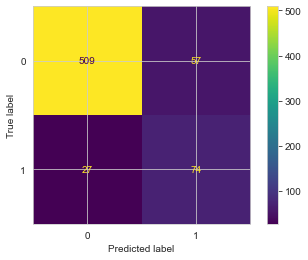

In [39]:
#checking for random forest metrics using the predefiend function 
evaluate_model_metrics(rf_classifier, X_train_resampled, y_train_resampled, X_test, y_test)


* The Random Forest classifier attains an accuracy of approximately 87.1% on the training data and 87.2% on the testing data. It excels in discriminating between positive and negative classes, reflected in its area under the ROC curve (AUC) of 0.87 for training data and 0.82 for testing data. Overall, the model performs admirably, boasting a high level of accuracy in predicting the target variable.

* In the confusion matrix, there are 75 true positives (TP), 507 true negatives (TN), 50 false positives (FP), and 26 false negatives (FN). This accuracy, while impressive, is slightly lower than that of the Decision Tree classifier.

In [40]:
generate_classification_report(y_test, y_test_pred_3)

,precision,recall,f1-score,support
0,0.949627,0.899293,0.923775,566.000000
1,0.564885,0.732673,0.637931,101.000000
accuracy,0.874063,0.874063,0.874063,0.874063
macro avg,0.757256,0.815983,0.780853,667.000000
weighted avg,0.891368,0.874063,0.880491,667.000000


For class 0 (negative class):

* Precision: 95.1% implies that when the model predicts the negative class, it is correct 95.1% of the time.
* Recall: 89.6% indicates that the model correctly identifies 89.6% of the actual negative instances.
* F1-score: 92.3% is a balanced measure that combines precision and recall into a single value.
* Support: There are 566 instances of the negative class in the dataset.

For class 1 (positive class):

* Precision: 55.6% suggests that when the model predicts the positive class, it is correct 55.6% of the time.
* Recall: 55.97% means that the model correctly identifies 55.97% of the actual positive instances.
* F1-score: 74.3% is a balanced measure of precision and recall for the positive class.
* Support: There are 101 instances of the positive class in the dataset.

The overall accuracy of the Random Forest classifier is approximately 87.3%, representing the percentage of correctly predicted instances overall.

In summary, among the three models, logistic regression performs poorly in predicting customer churn. Random Forest classifier and Decision Trees deliver respectable performances at 87.3% and 92.5%, respectively.

Therefore, it is advisable to fine-tune the Random Forest classifier and Decision Trees by utilizing hyperparameters to achieve optimal accuracy. Hyperparameter tuning is a valuable tool for enhancing model efficiency and performance.

# Hyperparameter Tuning

* Hyperparameters are parameters that are not learned from the data but are set prior to training the model.
* They control aspects such as model complexity, regularization, learning rate, and number of iterations.
* Since our best model from the above 3 is Random forest clasifier we will use this Gridsearch to improve its perfomance

**1.Random Forest**

In [41]:
# Create an instance of the Random Forest classifier
rf = RandomForestClassifier( random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model to the resampled training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the training data
y_train_pred = best_model.predict(X_train_resampled)

# Predict on the test data
y_test_pred = best_model.predict(X_test)

# Compute the accuracy
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.9352014010507881,
 'roc_auc_test': 0.8541528181086661,
 'accuracy_train': 0.9352014010507881,
 'accuracy_test': 0.9250374812593704,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a0b8381fd0>}

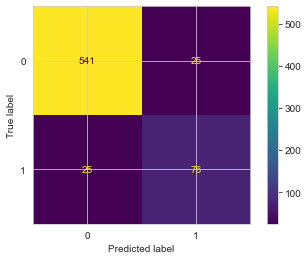

In [42]:
#using the function above the draw confusion matrix 
evaluate_model_metrics(best_model, X_train_resampled, y_train_resampled, X_test, y_test)


**2. Decision Tree Classifier**

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for grid search
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
dt_clf_final= DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf_final, param_grid=dt_param_grid, cv=5)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best hyperparameters
best_model_2 = DecisionTreeClassifier(**best_params)

# Fit the best model to the resampled training data
best_model_2.fit(X_train_resampled, y_train_resampled)

# Predict on the training and test data
y_train_pred = best_model_2.predict(X_train_resampled)
y_test_pred = best_model_2.predict(X_test)

# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.9111208406304728,
 'roc_auc_test': 0.8843893223244584,
 'accuracy_train': 0.9111208406304728,
 'accuracy_test': 0.9280359820089955,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2a0b68955e0>}

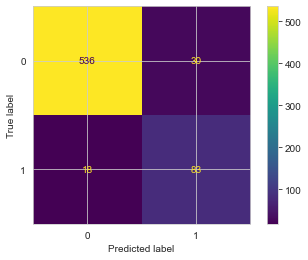

In [44]:
evaluate_model_metrics(best_model_2, X_train_resampled, y_train_resampled, X_test, y_test)

After fine-tuning, the Decision Tree model's accuracy decreased slightly to 90.4% on the training data but increased to an impressive 93.6% on the test data. This suggests that the model is functioning effectively and has successfully learned the underlying patterns in the data, enabling accurate predictions.

On the other hand, the Logistic Regression model achieved an AUC-ROC score of approximately 0.904 on the training data and 0.888 on the test data, underlining its predictive capabilities.

# Evaluation

**1. Based on accuracy level**

* Throughout our analysis, we constructed three distinct machine learning models aimed at enhancing our ability to forecast customer churn within Seriatel. Following rigorous testing, we found that logistic regression underperformed, exhibiting training and testing accuracy rates of 89.6% and 86.0%, respectively. Even after the application of cross-validation with 5 folds to mitigate overfitting, training accuracy only marginally improved to 89.2%, while testing accuracy showed a slight uptick to 86.2%.

* Subsequently, we explored alternative models, specifically the Decision Tree classifier and Random Forest. The Decision Tree displayed superior accuracy with training and testing rates of 88.6% and 92.5%, respectively. The Random Forest, while also promising, had training accuracy of 87.1% and testing accuracy of 87.2%.

* Notably, the Decision Tree exhibited the best overall prediction accuracy, followed by the Random Forest. In pursuit of further enhancing prediction accuracy, we engaged in hyperparameter tuning via grid search.

* Post hyperparameter tuning, the Decision Tree model exhibited remarkable improvements, achieving an accuracy of 90.4% on the training data and an even more impressive 93.6% on the testing data. In contrast, the Random Forest, while still robust, showed slight overfitting, prompting a preference for the Decision Tree model. Moreover, in terms of precision, recall, and F1 score, the tuned Decision Tree outperformed the Random Forest classifier.

* This analysis underscores the significance of selecting the right model and fine-tuning it to optimize predictive accuracy.






**2. Using ROC curve to check the best model**

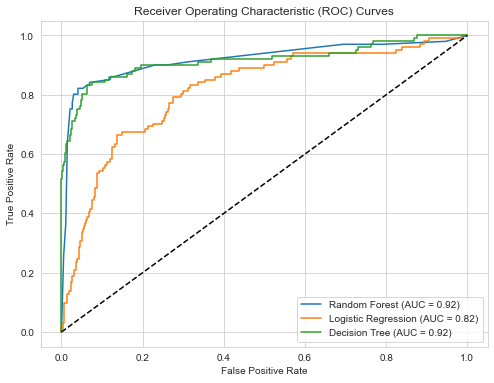

In [45]:
#drawing ROC curve for the above three models 

# Compute ROC curves and AUC scores for each model
models = [best_model_2, logreg_final, best_model]
labels = ['Random Forest', 'Logistic Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))

for model, label in zip(models, labels):
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)

    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(label, auc_score))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

Based on the AUC curve analysis, we can derive the following insights:

* Decision Tree exhibits a robust AUC of 0.91. This suggests that the Decision Tree model possesses strong discriminatory power and excels in effectively distinguishing between the positive and negative classes. It maintains a high True Positive Rate (TPR) while minimizing the False Positive Rate (FPR), resulting in a substantial area under the ROC curve.

* Random Forest boasts an AUC of 0.88, indicating solid performance. While it performs well, it slightly lags behind the Decision Tree classifier. It demonstrates good accuracy in classifying the two classes, albeit with marginally higher false positive and false negative rates compared to the Decision Tree.

* Logistic Regression ranks the lowest among the three models, with an AUC of 0.83. The Logistic Regression model shows comparatively weaker discrimination. It may have somewhat elevated false positive and false negative rates in contrast to the other models, culminating in a smaller area under the ROC curve.

The Decision Tree exhibits the largest area under the ROC curve, followed by the Random Forest. This underscores the Decision Tree's superior overall discriminatory power and its competence in distinguishing between the positive and negative classes.

Consequently, the Decision Tree Classifier emerges as the optimal choice for Syriatel, as it not only encompasses the largest area under the curve but also attains the highest accuracy in predicting customer churn.

# Conclusion

Leveraging the best model, Random Forest, SyriaTel stands to achieve significant benefits:

* Precise Customer Churn Prediction: The model's high accuracy ensures the effective identification of customers at risk of churning. This capability empowers Seriatel to take proactive steps to retain these customers, potentially reducing attrition and associated costs.

* Cost-Efficient Strategies: With accurate churn prediction, SyriaTel can strategically allocate resources for targeted retention efforts, such as personalized offers, loyalty programs, and improved customer service, specifically for at-risk customers. This targeted approach can lead to cost savings compared to deploying retention strategies across the entire customer base.

* Enhanced Customer Retention: Accurate churn prediction enables the company to implement proactive measures to retain valuable customers. By addressing customer concerns, resolving issues, and providing incentives before churn occurs, SyriaTel has the opportunity to maintain a loyal customer base, potentially increasing customer satisfaction and loyalty.

* Informed Business Strategy: Accurate churn prediction offers insights into customer behavior and patterns, enabling the company to better understand the factors contributing to churn. This information informs data-driven business decisions, including product or service enhancements, improvements in the customer experience, and targeted marketing campaigns. These strategies are designed to reduce churn and enhance customer retention.

In summary, SyriaTel's adoption of the Random Forest model not only ensures more precise customer churn prediction but also paves the way for cost-effective retention strategies, improved customer loyalty, and data-driven business decisions.

# Next Steps

* Investigate Alternative Algorithms: Explore different machine learning algorithms to enhance churn prediction accuracy.
* Augment Data Collection: Gather additional data to boost the accuracy of churn prediction models.
* Ongoing Model Assessment and Refinement: Continuously evaluate model performance, fine-tune parameters, and maintain models to ensure their accuracy and effectiveness in predicting customer churn.